
## Lab 2 z Podstaw Uczenia Maszynowego - Klasyfikacja Liniowa
### Autor: Dominik Pabiniak
### Nr indeksu: 254397

#### Importowanie wszystkich potrzebnych bibliotek

In [268]:
import time

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statistics


from sklearn.metrics import RocCurveDisplay
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import RidgeClassifier
from sklearn.datasets import make_classification
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc

In [269]:
def sensitivity(m_p):
    return round((m_p[0][0]/(m_p[0][0] + m_p[0][1]) * 100), 2)
def specificity(m_p):
    return round((m_p[1][1]/(m_p[1][0] + m_p[1][1]) * 100), 2)

def roc_curve_2(y_test, y_pred):
    tpr_list = [0]
    fpr_list = [0]
    sorted_indices = np.argsort(y_pred)
    y_pred_sorted = y_pred[sorted_indices]
    for i in range(1, len(y_pred) + 1):
        threshold = y_pred_sorted[i - 1]
        TP = np.sum((y_pred >= threshold) & (y_test == 1))
        FP = np.sum((y_pred >= threshold) & (y_test == 0))
        TN = np.sum((y_pred < threshold) & (y_test == 0))
        FN = np.sum((y_pred < threshold) & (y_test == 1))
        tpr = TP / (TP + FN)
        fpr = FP / (FP + TN)
        tpr_list.append(tpr)
        fpr_list.append(fpr)
    return tpr_list, fpr_list


def macierz_pomylek(y_test, y_pred):
    TP = sum([1 if tp == 1 and yp == 1 else 0 for (tp, yp) in zip(y_test, y_pred)])
    FN = sum([1 if tp == 0 and yp == 1 else 0 for (tp, yp) in zip(y_test, y_pred)])
    FP = sum([1 if tp == 1 and yp == 0 else 0 for (tp, yp) in zip(y_test, y_pred)])
    TN = sum([1 if tp == 0 and yp == 0 else 0 for (tp, yp) in zip(y_test, y_pred)])
    return np.array([[TP, FN], [FP, TN]])

X: 2597, y: 2597


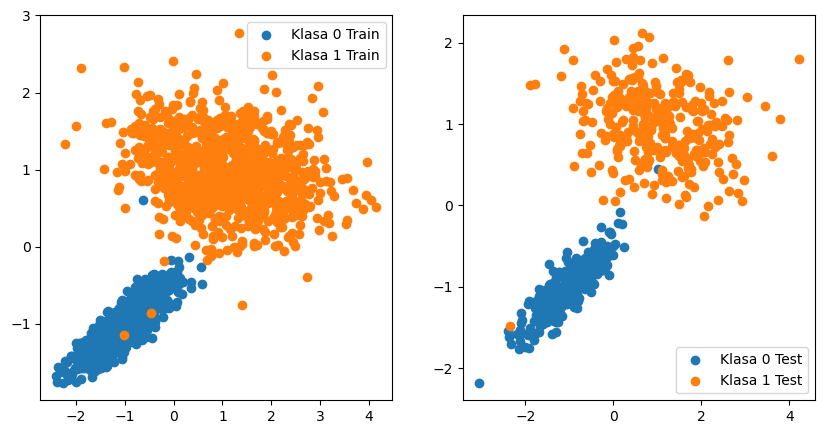

In [270]:
X, t = make_classification(n_samples=2597, n_features=2, n_clusters_per_class=1, n_redundant=0, random_state=254397)
X_train, X_test, y_train, y_test = train_test_split(X, t, test_size=0.25, random_state=254397)


klasa_0_X = X_train[(y_train == 0)]
klasa_1_X = X_train[(y_train == 1)]
test_0_X = X_test[(y_test == 0)]
test_1_X = X_test[(y_test == 1)]



plt.figure(figsize=(10, 5))
print(f'X: {len(X)}, y: {len(t)}')
plt.subplot(1, 2, 1)
plt.scatter(klasa_0_X[:,0], klasa_0_X[:,1], label='Klasa 0 Train')
plt.scatter(klasa_1_X[:,0], klasa_1_X[:,1], label='Klasa 1 Train')
# plt.scatter(X[:,0], t)
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(test_0_X[:,0], test_0_X[:,1], label='Klasa 0 Test')
plt.scatter(test_1_X[:,0], test_1_X[:,1], label='Klasa 1 Test')
plt.legend()



Czas metody analitycznej Ridge: 0.0 s
[0.00636725 0.17737975 0.70625701]
[[314   1]
 [  1 334]]
Czulosc: 99.68%
Swoistosc: 99.7%


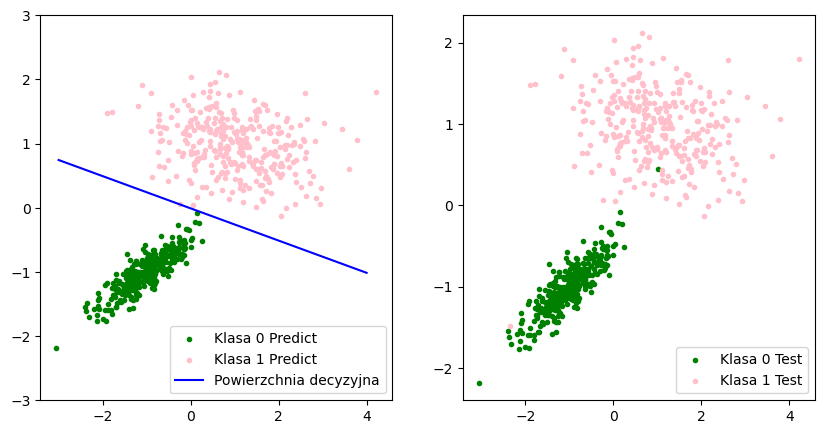

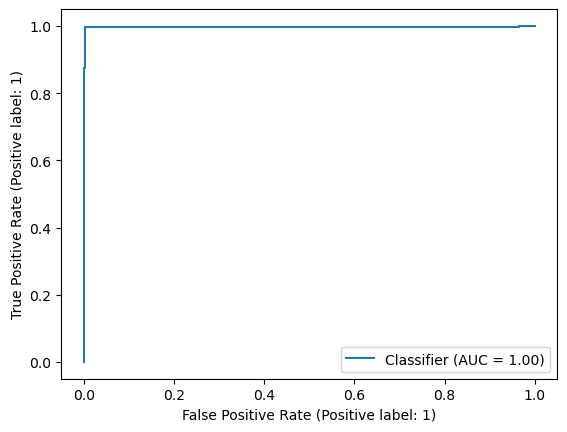

In [271]:
y_train_2 = np.array([1 if element == 1 else -1 for element in y_train])
X_train_1 = np.c_[np.ones((len(X_train), 1)), X_train]
X_test_1 = np.c_[np.ones((len(X_test), 1)), X_test]
start = time.time()

# lambda_16 = 0.001
# I = np.ones_like((X_train.T @ X_train)

lambda_16 = 0.001
I = np.eye(len(X_train_1.T @ X_train_1))

theta = np.linalg.inv(X_train_1.T @ X_train_1 + lambda_16 * I) @ X_train_1.T @ y_train_2
y_pred_a = X_test_1 @ theta
end = time.time()
print(f'Czas metody analitycznej Ridge: {end - start} s')


X_plot = np.linspace(-3, 4, 201)
y_plot = -(theta[1] / theta[2]) * X_plot - theta[0] / theta[2]
print(theta)
y_pred_2 = np.array([1 if yp > 0 else 0 for yp in y_pred_a])
X_pred_0 = X_test[y_pred_a < 0]
X_pred_1 = X_test[y_pred_a > 0]


macierz_pomylek_a = macierz_pomylek(y_test, y_pred_2)
print(macierz_pomylek_a)
print(f'Czulosc: {sensitivity(macierz_pomylek_a)}%\nSwoistosc: {specificity(macierz_pomylek_a)}%')


plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(X_pred_0[:,0], X_pred_0[:,1], label='Klasa 0 Predict', marker='.', color='green')
plt.scatter(X_pred_1[:,0], X_pred_1[:,1], label='Klasa 1 Predict', marker='.', color = 'pink')
plt.plot(X_plot, y_plot, label='Powierzchnia decyzyjna', color = 'blue')
plt.legend()
plt.ylim(-3, 3)

plt.subplot(1, 2, 2)
plt.scatter(test_0_X[:,0], test_0_X[:,1], label='Klasa 0 Test', marker='.', color='green')
plt.scatter(test_1_X[:,0], test_1_X[:,1], label='Klasa 1 Test', marker='.', color = 'pink')
plt.legend()



# tpr_a, fpr_a = roc_curve_2(y_test, y_pred_a)
# plt.figure()
# plt.scatter(fpr_a, tpr_a, color='darkorange', lw=2, label='Analityczna', marker='.')
# plt.title('ROC Curve Analityczna')
# plt.xlabel('FPR')
# plt.ylabel('TPR')

RocCurveDisplay.from_predictions(y_test, y_pred_a)


Czas metody analitycznej Ridge: 0.002991199493408203 s
[[314   1]
 [  1 334]]
Czulosc: 99.68%
Swoistosc: 99.7%


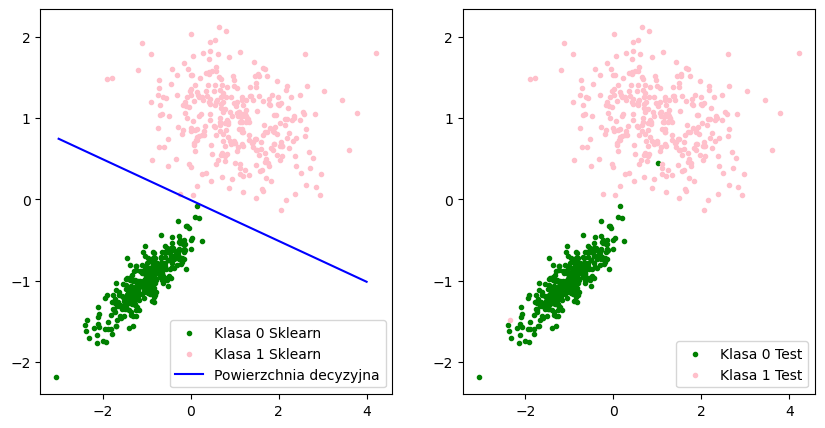

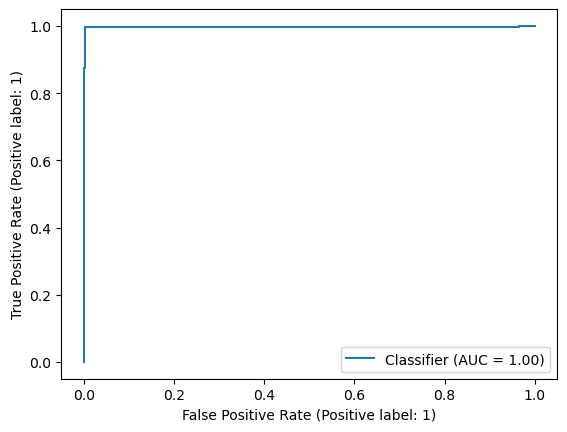

In [272]:
start = time.time()

r_classifier = RidgeClassifier(alpha=0.000001)
r_classifier.fit(X_train, y_train)
y_pred_sklearn = r_classifier.predict(X_test)

end = time.time()
print(f'Czas metody analitycznej Ridge: {end - start} s')

X_pred_0_sklearn = X_test[y_pred_sklearn == 0]
X_pred_1_sklearn = X_test[y_pred_sklearn == 1]

macierz_pomylek_sklearn = macierz_pomylek(y_test, y_pred_sklearn)
print(macierz_pomylek_sklearn)
print(f'Czulosc: {sensitivity(macierz_pomylek_sklearn)}%\nSwoistosc: {specificity(macierz_pomylek_sklearn)}%')

X_plot_sklearn = np.linspace(-3, 4, 201)
y_plot_sklearn = -(r_classifier.coef_[0][0] / r_classifier.coef_[0][1]) * X_plot - r_classifier.intercept_/r_classifier.coef_[0][1]
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(X_pred_0_sklearn[:,0], X_pred_0_sklearn[:,1], label='Klasa 0 Sklearn', marker='.', color='green')
plt.scatter(X_pred_1_sklearn[:,0], X_pred_1_sklearn[:,1], label='Klasa 1 Sklearn', marker='.', color = 'pink')
plt.plot(X_plot_sklearn, y_plot_sklearn, label='Powierzchnia decyzyjna', color = 'blue')
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(test_0_X[:,0], test_0_X[:,1], label='Klasa 0 Test', marker='.', color='green')
plt.scatter(test_1_X[:,0], test_1_X[:,1], label='Klasa 1 Test', marker='.', color = 'pink')
plt.legend()

y_scores = r_classifier.decision_function(X_test)
RocCurveDisplay.from_predictions(y_test, y_scores)
# fpr, tpr, threshold = roc_curve(y_test, y_scores)
# roc_auc = auc(fpr, tpr)
# plt.figure()
# # plt.plot(fpr, tpr, color='darkorange', lw=2)
# plt.plot(fpr, tpr, color='darkorange', lw=2, label='SKlearn (AUC = %0.2f)' % roc_auc)
# plt.legend()
# plt.title('ROC Curve Sklearn')
# plt.xlabel('FPR')
# plt.ylabel('TPR')

X: 2597, y: 2597


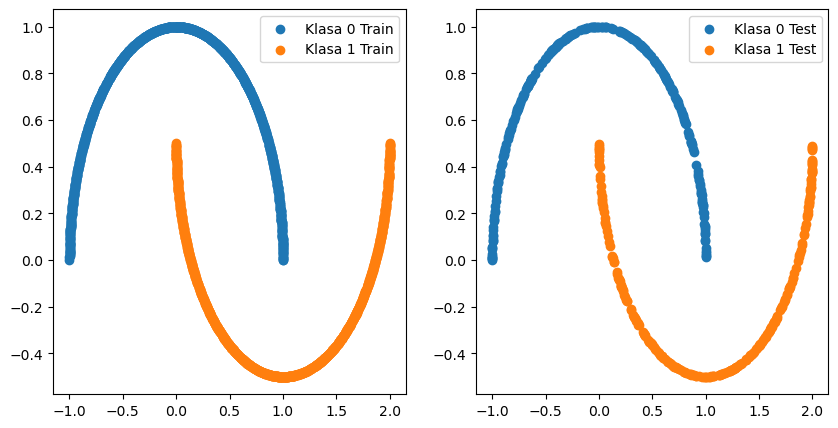

In [273]:
X_m, t_m = make_moons(n_samples=2597, random_state=254397)
X_train_M, X_test_M, y_train_M, y_test_M = train_test_split(X_m, t_m, test_size=.2, random_state=254397)

klasa_0_X_M = X_train_M[(y_train_M == 0)]
klasa_1_X_M = X_train_M[(y_train_M == 1)]
test_0_X_M = X_test_M[(y_test_M == 0)]
test_1_X_M = X_test_M[(y_test_M == 1)]


plt.figure(figsize=(10, 5))
print(f'X: {len(X)}, y: {len(t)}')
plt.subplot(1, 2, 1)
plt.scatter(klasa_0_X_M[:,0], klasa_0_X_M[:,1], label='Klasa 0 Train')
plt.scatter(klasa_1_X_M[:,0], klasa_1_X_M[:,1], label='Klasa 1 Train')
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(test_0_X_M[:,0], test_0_X_M[:,1], label='Klasa 0 Test')
plt.scatter(test_1_X_M[:,0], test_1_X_M[:,1], label='Klasa 1 Test')
plt.legend()

In [274]:
# y_train_M1 = np.array([1 if element == 1 else -1 for element in y_train_M])
# X_train_M1 = np.c_[X_train_M, np.ones((len(X_train_M), 1))]
# X_test_M1 = np.c_[X_test_M, np.ones((len(X_test_M), 1))]


# start = time.time()


# lambda_M = 0.001
# I = np.eye(len(X_train_M1.T @ X_train_M1))

# theta_M = np.linalg.inv(X_train_M1.T @ X_train_M1 + lambda_M * I) @ X_train_M1.T @ y_train_M1
# y_pred_M = X_test_M1 @ theta_M

# print(np.array(X_test_M1).shape)

# end = time.time()
# print(f'Czas metody analitycznej Ridge: {end - start} s')


# X_plot = np.linspace(-1, 2, 201)
# y_plot = -(theta_M[0] / theta_M[1]) * X_plot - theta_M[2] / theta_M[1]
# print(theta_M)

# y_pred_2_M = np.array([1 if yp > 0 else 0 for yp in y_pred_M])
# X_pred_0_M = X_test_M1[y_pred_M < 0]
# X_pred_1_M = X_test_M1[y_pred_M > 0]


# macierz_pomylek_a = macierz_pomylek(y_test_M, y_pred_2_M)
# print(macierz_pomylek_a)
# print(f'Czulosc: {sensitivity(macierz_pomylek_a)}%\nSwoistosc: {specificity(macierz_pomylek_a)}%')


# plt.figure(figsize=(10, 5))
# plt.subplot(1, 2, 1)
# plt.scatter(X_pred_0_M[:,0], X_pred_0_M[:,1], label='Klasa 0 Predict', marker='.', color='green')
# plt.scatter(X_pred_1_M[:,0], X_pred_1_M[:,1], label='Klasa 1 Predict', marker='.', color = 'pink')
# # plt.plot(X_plot, y_plot, label='Powierzchnia decyzyjna', color = 'blue')
# plt.legend()



# x_min, x_max = X_m[:, 0].min() - 0.2, X_m[:, 0].max() + 0.2
# y_min, y_max = X_m[:, 1].min() - 0.2, X_m[:, 1].max() + 0.2
# xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300), np.linspace(y_min, y_max, 300))
# # print(np.c_[xx.ravel(), yy.ravel()].shape)
# Z = [np.c_[xx.ravel(), yy.ravel(), np.ones((len(xx.ravel()), 1))]] @ theta_M
# print(Z[0])
# Z = np.array([1 if yp > 0 else 0 for yp in Z[0]])
# print(Z)
# Z = Z.reshape(xx.shape)
# plt.contourf(xx, yy, Z, alpha=0.2)
# plt.scatter(X_train_M[:, 0], X_train_M[:, 1], c=y_train_M, marker='.')
# plt.scatter(X_test_M[:, 0], X_test_M[:, 1], c=y_test_M, marker='.')




# test_0_X_M = X_test_M1[(y_test_M == 0)]
# test_1_X_M = X_test_M1[(y_test_M == 1)]

# plt.subplot(1, 2, 2)
# plt.scatter(test_0_X_M[:,0], test_0_X_M[:,1], label='Klasa 0 Test', marker='.', color='green')
# plt.scatter(test_1_X_M[:,0], test_1_X_M[:,1], label='Klasa 1 Test', marker='.', color = 'pink')
# plt.legend()

Czas metody analitycznej Ridge: 0.0029900074005126953 s
Dokladnosc: 100.0


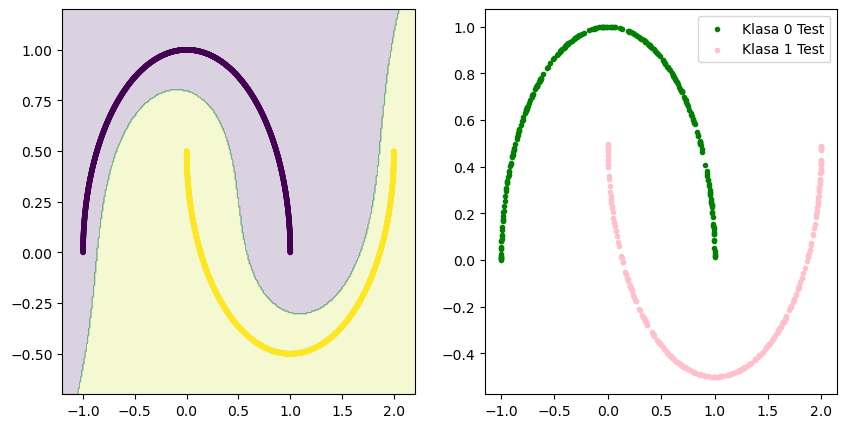

In [290]:
start = time.time()
y_train_M1 = np.array([1 if element == 1 else -1 for element in y_train_M])
poly_M = PolynomialFeatures(3)
XP_train_M = poly_M.fit_transform(X_train_M)
XP_test_M = poly_M.transform(X_test_M)

XP_train_M1 = np.c_[XP_train_M, np.ones((len(XP_train_M), 1))]
XP_test_M1 = np.c_[XP_test_M, np.ones((len(XP_test_M), 1))]

lambda_M = 0.001
I = np.eye(len(XP_train_M1.T @ XP_train_M1))

theta_M1 = np.linalg.inv(XP_train_M1.T @ XP_train_M1 + lambda_M * I) @ XP_train_M1.T @ y_train_M1
y_pred_M1 = XP_test_M1 @ theta_M1
end = time.time()
print(f'Czas metody analitycznej Ridge: {end - start} s')


y_pred_2_M1 = np.array([1 if yp > 0 else 0 for yp in y_pred_M1])
X_pred_0_M1 = X_test_M[y_pred_M1 < 0]
X_pred_1_M1 = X_test_M[y_pred_M1 > 0]

accuracy = accuracy_score(y_test_M, y_pred_2_M1)
print(f'Dokladnosc: {accuracy * 100}%')

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
x_min, x_max = X_m[:, 0].min() - 0.2, X_m[:, 0].max() + 0.2
y_min, y_max = X_m[:, 1].min() - 0.2, X_m[:, 1].max() + 0.2

xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300), np.linspace(y_min, y_max, 300))
Z1 = np.c_[xx.ravel(), yy.ravel()]
ZP = poly_M.transform(Z1)

ZP = np.c_[ZP, np.ones((len(ZP), 1))]
Z = ZP @ theta_M1
Z = np.array([1 if yp > 0 else 0 for yp in Z])

Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.2)

plt.scatter(X_train_M[:, 0], X_train_M[:, 1], c=y_train_M, marker='.')
plt.scatter(X_test_M[:, 0], X_test_M[:, 1], c=y_test_M, marker='.')


plt.subplot(1, 2, 2)
plt.scatter(test_0_X_M[:,0], test_0_X_M[:,1], label='Klasa 0 Test', marker='.', color='green')
plt.scatter(test_1_X_M[:,0], test_1_X_M[:,1], label='Klasa 1 Test', marker='.', color = 'pink')
plt.legend()

Dokladnosc: 1.0
Czas metody analitycznej Ridge: 0.00299072265625 s


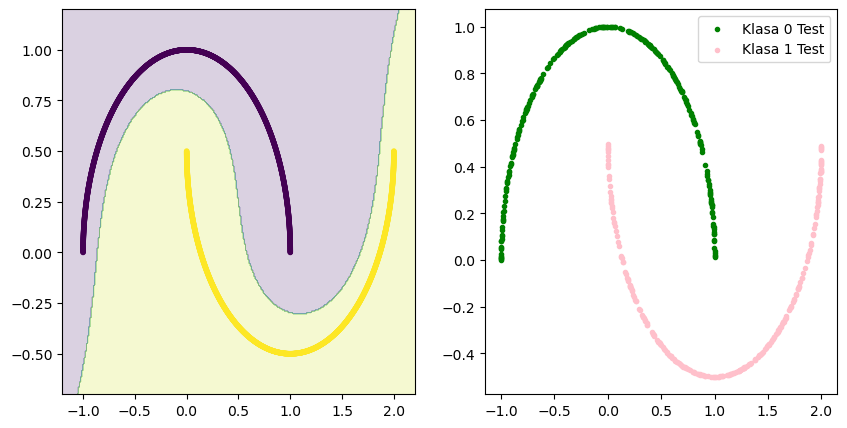

In [287]:
start = time.time()

model_M = make_pipeline(PolynomialFeatures(degree=3), RidgeClassifier(alpha=0.0001))
model_M.fit(X_train_M, y_train_M)

y_pred_sklearn_M = model_M.predict(X_test_M)

accuracy = accuracy_score(y_test_M, y_pred_sklearn_M)
print(f'Dokladnosc: {accuracy * 100}%')

end = time.time()
print(f'Czas metody analitycznej Ridge: {end - start} s')

X_pred_0_M2 = X_test_M[y_pred_sklearn_M == 0]
X_pred_1_M2 = X_test_M[y_pred_sklearn_M == 1]


plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)

test_0_X_M = X_test_M[(y_test_M == 0)]
test_1_X_M = X_test_M[(y_test_M == 1)]


x_min, x_max = X_m[:, 0].min() - 0.2, X_m[:, 0].max() + 0.2
y_min, y_max = X_m[:, 1].min() - 0.2, X_m[:, 1].max() + 0.2
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300), np.linspace(y_min, y_max, 300))
Z = model_M.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)


plt.contourf(xx, yy, Z, alpha=0.2)
plt.scatter(X_train_M[:, 0], X_train_M[:, 1], c=y_train_M, marker='.')
plt.scatter(X_test_M[:, 0], X_test_M[:, 1], c=y_test_M, marker='.')


plt.subplot(1, 2, 2)
plt.scatter(test_0_X_M[:,0], test_0_X_M[:,1], label='Klasa 0 Test', marker='.', color='green')
plt.scatter(test_1_X_M[:,0], test_1_X_M[:,1], label='Klasa 1 Test', marker='.', color = 'pink')
plt.legend()


In [277]:
#Missing values: ca, thal
column_names = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num']
column_names2 = np.array(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal'])

heart_cleveland = pd.read_csv('HeartCleveland.csv', names=column_names, na_values='?')

missing_values_count = heart_cleveland.isnull().sum()
print(f'Brakujace wartosci:\n{missing_values_count}')

heart_cleveland = heart_cleveland.dropna()
missing_values_count = heart_cleveland.isnull().sum()
print(f'Brakujace wartosci po usunieciu:\n{missing_values_count}')

heart_cleveland['num'].clip(upper=1, inplace=True)

average = []
minimum = []
maximum = []
std_deviation = []
integer_columns = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca']

sick = heart_cleveland[heart_cleveland.num == 1]
healthy = heart_cleveland[heart_cleveland.num == 0]


for column in column_names[:-1]:

    if column not in integer_columns:
        print(f'Kolumna {column} jest kategoryczna')
        average.append(statistics.mode(heart_cleveland[column].values))
    else:
        print(f'Kolumna {column.title()} jest ciagla')
        average.append(sum(heart_cleveland[column].values)/len(heart_cleveland[column]))

    minimum.append(min(heart_cleveland[column].values))
    maximum.append(max(heart_cleveland[column].values))
    std_deviation.append((heart_cleveland[column].values).std())

    # plt.figure()
    # plt.hist([healthy[column], sick[column]], bins=10, color=['g', 'r'], label=['healthy', 'sick'])
    # plt.legend()
    # plt.title(column)
index_data = ['average', 'minimum', 'maximum', 'std_deviation']
data = pd.DataFrame([average, minimum, maximum, std_deviation], columns=column_names2, index=index_data)
# print(f'Srednia/dominanta: {average}\nMinimum: {minimum}\nMaksimum: {maximum}\nOdchylenie standardowe: {std_deviation}')
data

Brakujace wartosci:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
num         0
dtype: int64
Brakujace wartosci po usunieciu:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64
Kolumna Age jest ciagla
Kolumna sex jest kategoryczna
Kolumna cp jest kategoryczna
Kolumna Trestbps jest ciagla
Kolumna Chol jest ciagla
Kolumna fbs jest kategoryczna
Kolumna restecg jest kategoryczna
Kolumna Thalach jest ciagla
Kolumna exang jest kategoryczna
Kolumna Oldpeak jest ciagla
Kolumna slope jest kategoryczna
Kolumna Ca jest ciagla
Kolumna thal jest kategoryczna


C:\Users\Dominik\AppData\Local\Temp\ipykernel_4576\490042414.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  heart_cleveland['num'].clip(upper=1, inplace=True)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
average,54.542088,1.000000,4.000000,131.693603,247.350168,0.00000,0.000000,149.599327,0.000000,1.055556,1.000000,0.676768,3.000000
minimum,29.000000,0.000000,1.000000,94.000000,126.000000,0.00000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000
maximum,77.000000,1.000000,4.000000,200.000000,564.000000,1.00000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000
std_deviation,9.034488,0.467711,0.963234,17.732877,51.909971,0.35188,0.993237,22.902907,0.468969,1.164158,0.617145,0.937382,1.935362


In [278]:
correlation_matrix = pd.DataFrame(heart_cleveland.corr())
# print(f'Macierz korelacji: \n{correlation_matrix}')
# thalach(0.42), oldpeak(0.5), ca(0.52), thal(0.51)
correlation_matrix

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
age,1.000000,-0.092399,0.110471,0.290476,0.202644,0.132062,0.149917,-0.394563,0.096489,0.197123,0.159405,0.362210,0.126586,0.227075
sex,-0.092399,1.000000,0.008908,-0.066340,-0.198089,0.038850,0.033897,-0.060496,0.143581,0.106567,0.033345,0.091925,0.383652,0.278467
cp,0.110471,0.008908,1.000000,-0.036980,0.072088,-0.057663,0.063905,-0.339308,0.377525,0.203244,0.151079,0.235644,0.268500,0.408945
trestbps,0.290476,-0.066340,-0.036980,1.000000,0.131536,0.180860,0.149242,-0.049108,0.066691,0.191243,0.121172,0.097954,0.138183,0.153490
chol,0.202644,-0.198089,0.072088,0.131536,1.000000,0.012708,0.165046,-0.000075,0.059339,0.038596,-0.009215,0.115945,0.010859,0.080285
fbs,0.132062,0.038850,-0.057663,0.180860,0.012708,1.000000,0.068831,-0.007842,-0.000893,0.008311,0.047819,0.152086,0.062209,0.003167
restecg,0.149917,0.033897,0.063905,0.149242,0.165046,0.068831,1.000000,-0.072290,0.081874,0.113726,0.135141,0.129021,0.018795,0.166343
thalach,-0.394563,-0.060496,-0.339308,-0.049108,-0.000075,-0.007842,-0.072290,1.000000,-0.384368,-0.347640,-0.389307,-0.268727,-0.274831,-0.423817
exang,0.096489,0.143581,0.377525,0.066691,0.059339,-0.000893,0.081874,-0.384368,1.000000,0.289310,0.250572,0.148232,0.326927,0.421355
oldpeak,0.197123,0.106567,0.203244,0.191243,0.038596,0.008311,0.113726,-0.347640,0.289310,1.000000,0.579037,0.294452,0.344976,0.424052


In [279]:
chosen_columns = ['thalach', 'oldpeak', 'ca', 'thal']
X = np.array(heart_cleveland[chosen_columns].values)
y = np.array(heart_cleveland.iloc[:, -1].values)
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X, y, test_size=0.2, random_state=254397)

In [280]:
min_val = np.min(X_train_2, axis=0)
max_val = np.max(X_train_2, axis=0)
X_train_2 = (X_train_2 - min_val) / (max_val - min_val)

min_val = np.min(X_test_2, axis=0)
max_val = np.max(X_test_2, axis=0)
X_test_2 = (X_test_2 - min_val) / (max_val - min_val)

# min_val = np.min(y_train_2, axis=0)
# max_val = np.max(y_train_2, axis=0)
# y_train_2 = (y_train_2 - min_val) / (max_val - min_val)

Czas metody analitycznej Ridge: 0.00032806396484375 s
Dokladnosc metody analitycznej: 83.33%
[[21  6]
 [ 4 29]]
Czulosc: 77.78%
Swoistosc: 87.88%


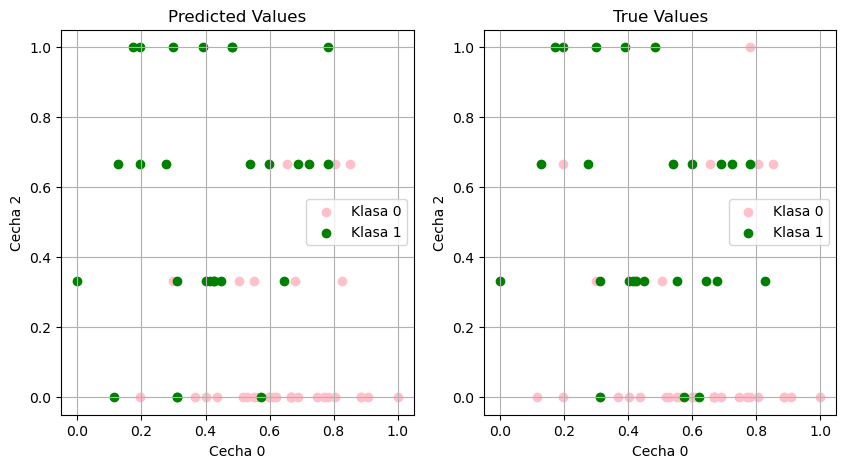

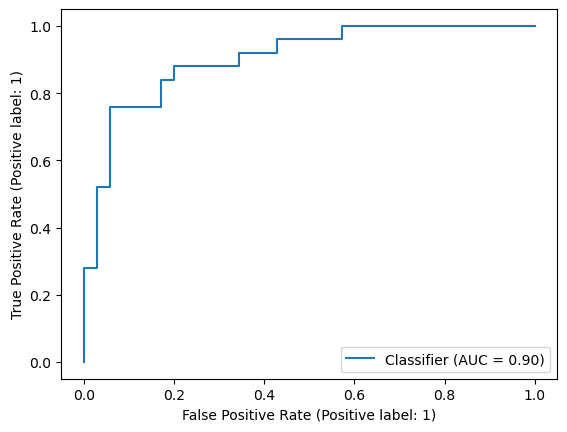

In [300]:
start = time.time()

y_train_2 = np.array([1 if element == 1 else -1 for element in y_train_2])

lambda_2 = 1
I = np.eye(len(X_train_2.T @ X_train_2))

theta = np.linalg.inv(X_train_2.T @ X_train_2 + lambda_2 * I) @ X_train_2.T @ y_train_2
y_pred_2 = X_test_2 @ theta

y_pred_2_4 = np.array([1 if yp > 0 else 0 for yp in y_pred_2])

end = time.time()
print(f'Czas metody analitycznej Ridge: {end - start} s')


feature = [0, 2]
colors = ['pink', 'green']
labels = ['Klasa 0', 'Klasa 1']


plt.figure(figsize=(10, 5))
for i in range(0, 2):
    plt.subplot(1, 2, 1)
    X_plot = X_test_2[y_pred_2_4 == i]
    plt.scatter(X_plot[:,feature[0]], X_plot[:,feature[1]], color=colors[i], marker='o', label=labels[i])
plt.legend()
plt.title('Predicted Values')
plt.grid()
plt.xlabel(f'Cecha {feature[0]}')
plt.ylabel(f'Cecha {feature[1]}')

plt.subplot(1, 2, 2)
for i in range(0, 2):
    X_plot = X_test_2[y_test_2 == i]
    plt.scatter(X_plot[:,feature[0]], X_plot[:,feature[1]], color=colors[i], marker='o', label=labels[i])
plt.legend()
plt.title('True Values')
plt.grid()
plt.xlabel(f'Cecha {feature[0]}')
plt.ylabel(f'Cecha {feature[1]}')

accuracy_2 = accuracy_score(y_test_2, y_pred_2_4)
print(f'Dokladnosc metody analitycznej: {round((accuracy_2 * 100), 2)}%')

macierz_pomylek_2 = macierz_pomylek(y_test_2, y_pred_2_4)
print(macierz_pomylek_2)
print(f'Czulosc: {sensitivity(macierz_pomylek_2)}%\nSwoistosc: {specificity(macierz_pomylek_2)}%')

# y_scores = r_classifier.decision_function(X_test)
RocCurveDisplay.from_predictions(y_test_2, y_pred_2)

Wybrane kolumny sklearn: ['thalach' 'exang' 'ca' 'thal']
Wybrane kolumny recznie: [thalach, oldpeak, ca, thal]
Dokldnosc: 85.0
[[21  5]
 [ 4 30]]
Czulosc: 80.77%
Swoistosc: 88.24%


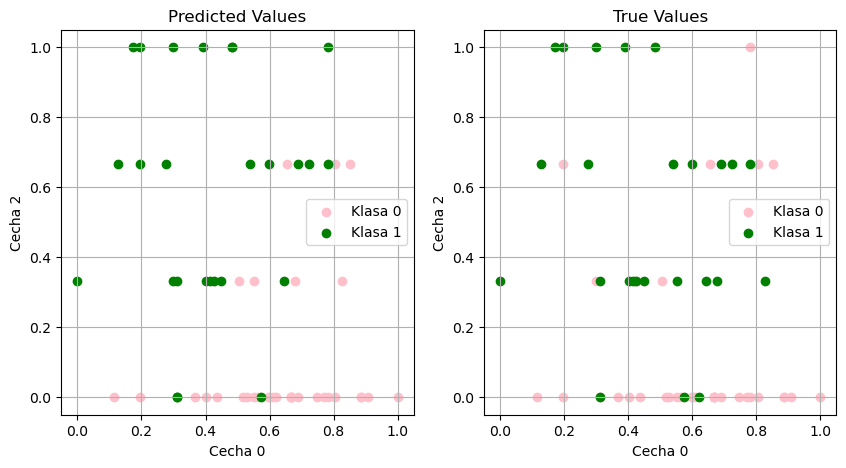

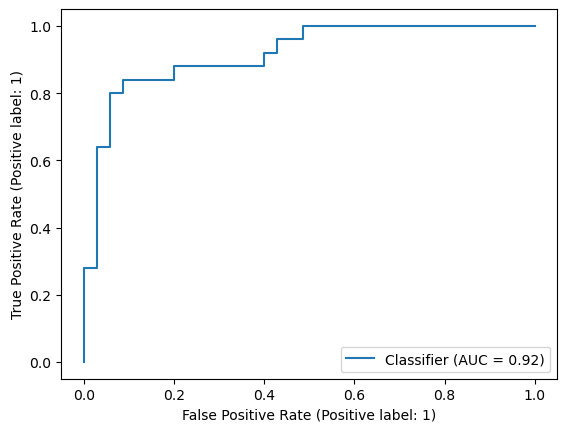

In [305]:
from sklearn.feature_selection import SequentialFeatureSelector
start = time.time()
X_SFS = np.array(heart_cleveland.iloc[:, :-1].values)
y_SFS = np.array(heart_cleveland.iloc[:, -1].values)



r3_classifier = RidgeClassifier(alpha=0.000001)
selector = SequentialFeatureSelector(r3_classifier, n_features_to_select=4)
selector.fit(X_SFS, y_SFS)
chosen_features = np.array(selector.get_support())


chosen_columns_2 = column_names2[chosen_features]
X_chosen = np.array(heart_cleveland[chosen_columns_2].values)

print(f'Wybrane kolumny sklearn: {chosen_columns_2}')
print(f'Wybrane kolumny recznie: [thalach, oldpeak, ca, thal]')
# thalach(0.42), oldpeak(0.5), ca(0.52), thal(0.51)


X_train_SFS, X_test_SFS, y_train_SFS, y_test_SFS = train_test_split(X_chosen, y_SFS, test_size=0.2, random_state=254397)

min_val = np.min(X_train_SFS, axis=0)
max_val = np.max(X_train_SFS, axis=0)
X_train_SFS = (X_train_SFS - min_val) / (max_val - min_val)

min_val = np.min(X_test_SFS, axis=0)
max_val = np.max(X_test_SFS, axis=0)
X_test_SFS = (X_test_SFS - min_val) / (max_val - min_val)

r3_classifier.fit(X_train_SFS, y_train_SFS)
y_pred_sklearn_SFS = r3_classifier.predict(X_test_SFS)

accuracy = accuracy_score(y_test_SFS, y_pred_sklearn_SFS)
print(f'Dokldnosc: {round(accuracy * 100, 2)}')


feature = [0, 2]
colors = ['pink', 'green']
labels = ['Klasa 0', 'Klasa 1']


plt.figure(figsize=(10, 5))
for i in range(0, 2):
    plt.subplot(1, 2, 1)
    X_plot = X_test_SFS[y_pred_sklearn_SFS == i]
    plt.scatter(X_plot[:,feature[0]], X_plot[:,feature[1]], color=colors[i], marker='o', label=labels[i])
plt.legend()
plt.title('Predicted Values')
plt.grid()
plt.xlabel(f'Cecha {feature[0]}')
plt.ylabel(f'Cecha {feature[1]}')

plt.subplot(1, 2, 2)
for i in range(0, 2):
    X_plot = X_test_SFS[y_test_SFS == i]
    plt.scatter(X_plot[:,feature[0]], X_plot[:,feature[1]], color=colors[i], marker='o', label=labels[i])
plt.legend()
plt.title('True Values')
plt.grid()
plt.xlabel(f'Cecha {feature[0]}')
plt.ylabel(f'Cecha {feature[1]}')

macierz_pomylek_2 = macierz_pomylek(y_test_SFS, y_pred_sklearn_SFS)
print(macierz_pomylek_2)
print(f'Czulosc: {sensitivity(macierz_pomylek_2)}%\nSwoistosc: {specificity(macierz_pomylek_2)}%')

y_scores_SFS = r3_classifier.decision_function(X_test_SFS)
# y_scores = r_classifier.decision_function(X_test)
RocCurveDisplay.from_predictions(y_test_SFS, y_scores_SFS)